In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import string
import re

#from wordcloud import WordCloud, STOPWORDS
import matplotlib.cm as cm

import unicodedata

In [2]:
pip install nltk --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl --quiet

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
from nltk.corpus import wordnet,stopwords

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [5]:
inp_df = pd.read_excel('./input_data.xlsx')
inp_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [6]:
inp_df.drop(columns='Caller',inplace=True)
inp_df.head()

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


In [7]:
inp_df.isnull().sum()
inp_df.dropna(inplace=True)

In [8]:
inp_df[inp_df.duplicated(['Short description', 'Description'])]

,Short description,Description,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,GRP_0
81,erp SID_34 account locked,erp SID_34 account locked,GRP_0
123,unable to display expense report,unable to display expense report,GRP_0
157,ess password reset,ess password reset,GRP_0
181,unable to connect to vpn,unable to connect to vpn,GRP_19
...,...,...,...
8424,windows account lockout,windows account lockout,GRP_0
8450,unable to connect to wifi,unable to connect to wifi,GRP_0
8451,password reset erp SID_34,password reset erp SID_34,GRP_0
8458,windows account locked,windows account locked,GRP_0


In [9]:
inp_df.drop_duplicates(['Short description','Description'],inplace=True)

In [10]:
inp_df.shape

(7887, 3)

In [11]:
inp_df['Assignment group'].value_counts()

GRP_0     3421
GRP_8      644
GRP_24     285
GRP_12     255
GRP_9      251
          ... 
GRP_67       1
GRP_35       1
GRP_70       1
GRP_73       1
GRP_72       1
Name: Assignment group, Length: 74, dtype: int64

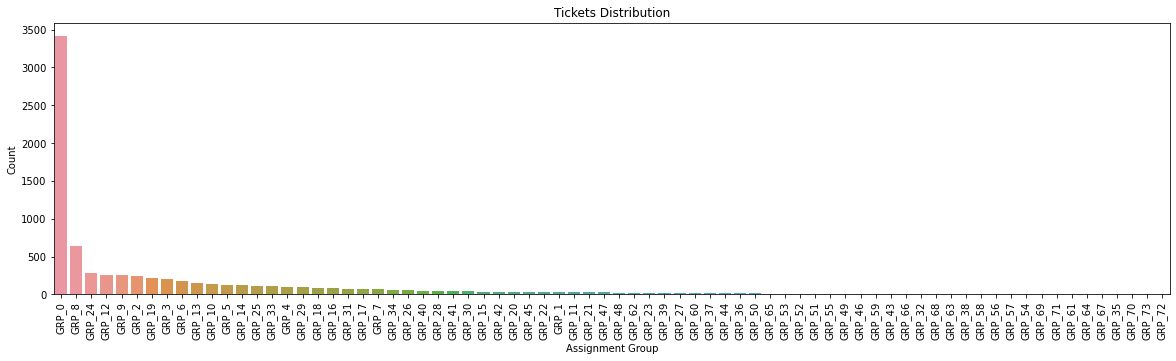

In [12]:
#Plot line graph and view counts of each tickets

plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=inp_df,order = inp_df['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

In [13]:
inp_df['Full Description'] = inp_df['Short description'] + ' '+ inp_df['Description']
inp_df.drop(columns=['Short description','Description'],inplace=True)
inp_df.head()

,Assignment group,Full Description
0,GRP_0,login issue -verified user details.(employee# ...
1,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,GRP_0,unable to access hr_tool page unable to access...
4,GRP_0,skype error skype error


In [14]:
!pip install langdetect --quiet

In [15]:
from langdetect import detect
inp_df.drop(inp_df[inp_df['Full Description'].apply(lambda x: detect(x) != 'en')].index, inplace = True)

In [16]:
inp_df.shape

(6662, 2)

In [17]:
inp_df.reset_index(drop=True, inplace=True)

In [18]:
inp_df.head()

,Assignment group,Full Description
0,GRP_0,login issue -verified user details.(employee# ...
1,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,GRP_0,unable to access hr_tool page unable to access...
4,GRP_0,unable to log in to engineering tool and skype...


In [19]:
!python -m nltk.downloader stopwords

/opt/conda/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
stopwords = set(stopwords.words('english'))

In [21]:
# Remove non alphabets
inp_df['Full Description'] = inp_df['Full Description'].apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))
# Convert text to lowercase
inp_df['Full Description'] = inp_df['Full Description'].apply(lambda x: x.lower())
# Strip unwanted spaces
inp_df['Full Description'] = inp_df['Full Description'].apply(lambda x: x.strip())
inp_df['Full Description'] = inp_df['Full Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [22]:
inp_df.head()

,Assignment group,Full Description
0,GRP_0,login issue verified user details employee man...
1,GRP_0,outlook x x received hmjdrvpb komuaywn gmail c...
2,GRP_0,cant log vpn x x received eylqgodm ybqkwiam gm...
3,GRP_0,unable access hr tool page unable access hr to...
4,GRP_0,unable log engineering tool skype unable log e...


In [23]:
all_words = list()
for line in inp_df['Full Description']:
    for w in line.split():
        all_words.append(w)

In [24]:
print('Size of vocabulary: {}'.format(len(set(all_words))))

Size of vocabulary: 13244


In [25]:
vocab_len = len(set(all_words))

In [26]:
embeddings_index = {}
f = open('../NLP/Project 2/glove.6B.50d.txt') # GLOBAL VECTOR of 50 dimensions
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.array(values[1:], dtype=np.float64)
    embeddings_index[word] = coefs
f.close()

In [27]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(inp_df['Full Description'])

words_to_index = tokenizer.word_index

2022-03-06 01:41:18.871810: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [28]:
embed_vector_len = 50

emb_matrix = np.zeros((20000, embed_vector_len))
for word, index in words_to_index.items():
    try:
        embedding_vector = embeddings_index[word]
    except KeyError:
        continue
    if embedding_vector is not None:
        emb_matrix[index, :] = embedding_vector

In [29]:
inp_df.sort_values(by=['Assignment group'])

,Assignment group,Full Description
0,GRP_0,login issue verified user details employee man...
2640,GRP_0,user uthagtpgc outlook issue received rgtarthi...
5446,GRP_0,mobile device activation shhkioaprhkuoash ms x...
5445,GRP_0,new user id new user id
5444,GRP_0,erp sid account lockout erp sid account lockout
...,...,...
2363,GRP_9,modify quote performance model model field pk ...
4257,GRP_9,hana received nealxjbc owjduxai gmail com earl...
3701,GRP_9,missing data bex productmanagement urgent x x ...
4728,GRP_9,job job failed job scheduler received monitori...


In [30]:
target_count = pd.DataFrame(inp_df['Assignment group'].value_counts())
target_count = target_count.T
inp_df['Count'] = inp_df.apply(lambda row: target_count[row['Assignment group']] , axis=1)

In [31]:
inp_df.drop(inp_df[inp_df['Count'] <= 100].index, inplace=True)

In [32]:
inp_df.reset_index(drop=True, inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
le = LabelEncoder()
le.fit(inp_df['Assignment group'])
inp_df['Assignment group'] = le.transform(inp_df['Assignment group'])

In [34]:
inp_df.head()

,Assignment group,Full Description,Count
0,0,login issue verified user details employee man...,2824
1,0,outlook x x received hmjdrvpb komuaywn gmail c...,2824
2,0,cant log vpn x x received eylqgodm ybqkwiam gm...,2824
3,0,unable access hr tool page unable access hr to...,2824
4,0,unable log engineering tool skype unable log e...,2824


In [35]:
inp_df.drop(['Count'], axis=1, inplace=True)

In [36]:
inp_df.head()

,Assignment group,Full Description
0,0,login issue verified user details employee man...
1,0,outlook x x received hmjdrvpb komuaywn gmail c...
2,0,cant log vpn x x received eylqgodm ybqkwiam gm...
3,0,unable access hr tool page unable access hr to...
4,0,unable log engineering tool skype unable log e...


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inp_df['Full Description'], inp_df['Assignment group'], 
    test_size=0.15, random_state=0)

In [38]:
len(inp_df[inp_df['Full Description'].apply(lambda x: len(x.split()) > 10)])

4106

In [39]:
maxLen = 10

In [40]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

In [51]:
# create model 
import tensorflow as tf
model = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(20000, embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=False),
    
    # add the bi-lstm layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    
    # add another bi-lstm layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64), input_shape=(10, 50)),
    
    # add dropout layer to prevent overfitting
    tf.keras.layers.Dropout(0.2),
    
    # add a dense layer
    tf.keras.layers.Dense(256, activation=tf.keras.activations.relu),
    
    # add the prediction layer
    tf.keras.layers.Dense(len(np.unique(inp_df['Assignment group'])), activation = tf.keras.activations.softmax),
])

model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 50)            1000000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 10, 64)            21248     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               66048     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 12)                3084      
Total params: 1,123,404
Trainable params: 123,404
Non-trainable params: 1,000,000
______________________________________

In [42]:
from keras.preprocessing.sequence import pad_sequences
X_train_indices = tokenizer.texts_to_sequences(X_train)

X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')

In [ ]:
model.fit(X_train_indices, y_train, epochs=10, batch_size=10)

Epoch 1/10
447/447 [==============================] - 3s 6ms/step - loss: 0.7770 - accuracy: 0.7322
Epoch 2/10
447/447 [==============================] - 3s 6ms/step - loss: 0.7224 - accuracy: 0.7569
Epoch 3/10
447/447 [==============================] - 3s 6ms/step - loss: 0.6705 - accuracy: 0.7701
Epoch 4/10
447/447 [==============================] - 3s 6ms/step - loss: 0.6100 - accuracy: 0.7797
Epoch 5/10
447/447 [==============================] - 3s 6ms/step - loss: 0.5612 - accuracy: 0.8013
Epoch 6/10
447/447 [==============================] - 3s 6ms/step - loss: 0.5130 - accuracy: 0.8107
Epoch 7/10
447/447 [==============================] - 3s 6ms/step - loss: 0.4580 - accuracy: 0.8326
Epoch 8/10
447/447 [==============================] - 3s 6ms/step - loss: 0.4107 - accuracy: 0.8441
Epoch 9/10
447/447 [==============================] - 3s 7ms/step - loss: 0.3972 - accuracy: 0.8508
Epoch 10/10
303/447 [===================>..........] - ETA: 0s - loss: 0.3616 - accuracy: 0.8677